In [1]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn. metrics import classification_report, roc_auc_score, roc_curve
import pickle
import streamlit as st
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

In [2]:
# 1. Read data
data = pd.read_csv("spam.csv", encoding='latin-1')

In [3]:
# 2. Data pre-processing
source = data['v2']
target = data['v1']
# ham = 0, spam = 1
target = target.replace("ham", 0)
target = target.replace("spam", 1)

text_data = np.array(source)

count = CountVectorizer(max_features=6000)
count.fit(text_data)
bag_of_words = count.transform(text_data)

X = bag_of_words.toarray()

y = np.array(target)

In [4]:
# 3. Build model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) 

clf = MultinomialNB()
model = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [5]:
#4. Evaluate model
score_train = model.score(X_train,y_train)
score_test = model.score(X_test,y_test)
acc = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

cr = classification_report(y_test, y_pred)

y_prob = model.predict_proba(X_test)
roc = roc_auc_score(y_test, y_prob[:, 1])

In [6]:
print("Accuracy:")
print("Train Score:",round(score_train,4))
print("Train Score:",round(score_test,4))
print("Accuracy:",round(acc,4))
print("ROC Accuracy:",round(roc,4))
print(" ")
print("confusion Matrix:")
print(cm)

Accuracy:
Train Score: 0.9926
Train Score: 0.9874
Accuracy: 0.9874
ROC Accuracy: 0.9906
 
confusion Matrix:
[[944   5]
 [  9 157]]


In [7]:
print("Classification Report:")
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       949
           1       0.97      0.95      0.96       166

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



TypeError: 'module' object is not callable

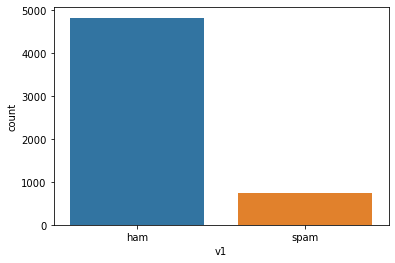

In [8]:
fig1 = sns.countplot(data=data[["v1"]], x="v1")
plt(fig1.figure)

2023-01-11 19:46:50.575 
  command:

    streamlit run C:\Users\Tamzid\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

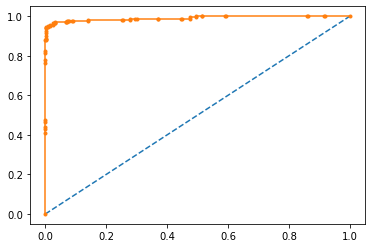

In [9]:
# Calculate ROC Curve
st.write("###### ROC Curve")
fpr, tpr, threholds = roc_curve(y_test, y_prob[:, 1])
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], linestyle="--")
ax.plot(fpr, tpr, marker=".")
st.pyplot(fig)

In [10]:
df_spam  = data[data.v1 == 'spam'].copy()
df_ham = data[data.v1 == 'ham'].copy()

In [13]:
import wordcloud

def generate_wordcloud(data_frame, v1):
    text = ' '.join(data_frame['v2'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(v1, fontsize=20 )
    plt.show()

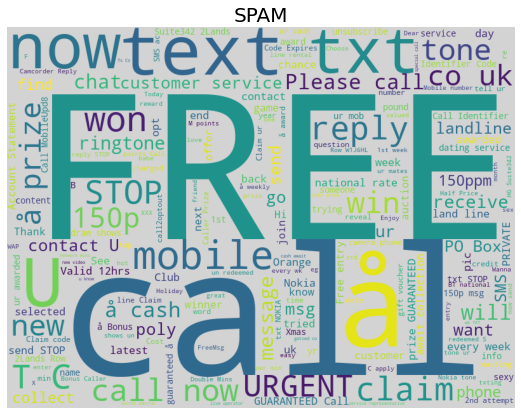

In [14]:
generate_wordcloud(df_spam, 'SPAM')

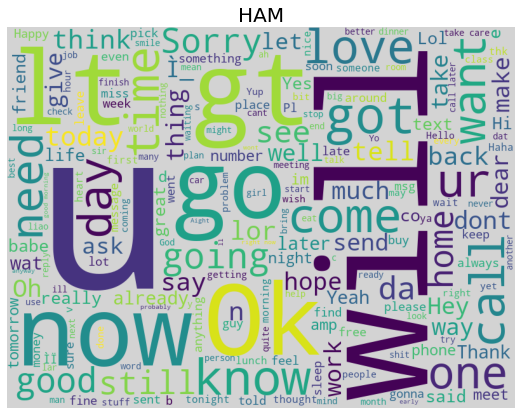

In [15]:
generate_wordcloud(df_ham, 'HAM')